Notebook to analyse how transaction amounts change per revenue band.

In [1]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder.appName("MAST30034 Project 2")
    .config("spark.driver.memory", '4g')
    .config("spark.executor.memory", '8g')
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.sql.parquet.enableVectorizedReader","false")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .getOrCreate()
)

22/09/15 13:42:10 WARN Utils: Your hostname, adi-laptop resolves to a loopback address: 127.0.1.1; using 172.22.121.94 instead (on interface eth0)
22/09/15 13:42:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/15 13:42:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Reading in the data.

In [2]:
merchants = spark.read.parquet('../data/curated/merchants_df.parquet')
transactions1 = spark.read.parquet('../data/tables/transactions_20210228_20210827_snapshot/')

In [3]:
merchants.show(10, truncate=False)

+------------+------------------------------------+--------------------------------------------------------------------------------+-------------+---------+
|merchant_abn|name                                |category                                                                        |revenue_level|take_rate|
+------------+------------------------------------+--------------------------------------------------------------------------------+-------------+---------+
|10023283211 |Felis Limited                       |[furniture, home furnishings, equipment shops, manufacturers, except appliances]|e            |0.18     |
|10142254217 |Arcu Ac Orci Corporation            |[cable, satellite, other pay television, radio services]                        |b            |4.22     |
|10165489824 |Nunc Sed Company                    |[jewelry, watch, clock, silverware shops]                                       |b            |4.4      |
|10187291046 |Ultricies Dignissim Lacus Foundation|[watch,

In [4]:
transactions1.show(10, truncate=False)

+-------+------------+------------------+------------------------------------+--------------+
|user_id|merchant_abn|dollar_value      |order_id                            |order_datetime|
+-------+------------+------------------+------------------------------------+--------------+
|18478  |62191208634 |63.255848959735246|949a63c8-29f7-4ab0-ada4-99ac50a88952|2021-08-20    |
|2      |15549624934 |130.3505283105634 |6a84c3cf-612a-4574-835b-144a47353eff|2021-08-20    |
|18479  |64403598239 |120.15860593212783|b10dcc33-e53f-4254-863c-de5266810cbc|2021-08-20    |
|3      |60956456424 |136.6785200286976 |0f09c5a5-784e-4477-b049-8ee4dd069b7b|2021-08-20    |
|18479  |94493496784 |72.96316578355305 |f6c78c1a-4600-4c5f-8e97-6e9eb534b586|2021-08-20    |
|3      |76819856970 |448.529684285612  |5ace6a24-cdf0-4aa3-b571-1d9406b352b5|2021-08-20    |
|18479  |67609108741 |86.4040605836911  |d0e180f0-cb06-42a3-bd1a-c47dca15bc55|2021-08-20    |
|3      |34096466752 |301.5793450525113 |6fb1ff48-24bb-4f97-

In [5]:
transactions1.count()

3643266

In [6]:
transactions2 = spark.read.parquet('../data/tables/transactions_20210828_20220227_snapshot/')
transactions3 = spark.read.parquet('../data/tables/transactions_20220228_20220828_snapshot/')

In [7]:
transactions2.count(), transactions3.count()

(4508106, 6044133)

In [8]:
transactions2.show(10, truncate=False)

+-------+------------+------------------+------------------------------------+--------------+
|user_id|merchant_abn|dollar_value      |order_id                            |order_datetime|
+-------+------------+------------------+------------------------------------+--------------+
|14935  |79417999332 |136.06570809815838|23acbb7b-cf98-4580-9775-86b8e0a2bd88|2021-11-26    |
|1      |46451548968 |72.61581642788431 |76bab304-fa2d-4004-8179-8638b56a873e|2021-11-26    |
|14936  |89518629617 |3.0783487174439297|a2ae446a-2959-41c4-81fd-a30c1efbde0c|2021-11-26    |
|1      |49167531725 |51.58228625503599 |7080c274-17f7-4ccf-be22-1d33a45f7f81|2021-11-26    |
|14936  |31101120643 |25.228114942417797|8e301c0f-06ab-45cb-a573-47c8e9b95423|2021-11-26    |
|2      |67978471888 |691.5028234458998 |0380e9ad-b0e8-4203-a74b-e4ad3504d643|2021-11-26    |
|14936  |60956456424 |102.13952056640888|5ac3da9c-5147-4524-8efb-0d312cfe6748|2021-11-26    |
|2      |47644196714 |644.5220654863093 |4e368e44-86f8-4dee-

In [9]:
transactions3.show(10, truncate=False)

+-------+------------+------------------+------------------------------------+--------------+
|user_id|merchant_abn|dollar_value      |order_id                            |order_datetime|
+-------+------------+------------------+------------------------------------+--------------+
|11139  |96152467973 |16.213590228273233|785b0080-9e4b-471a-9b1f-6a8a9dc535c2|2022-08-20    |
|1      |98973094975 |86.97955945703498 |2560f7b0-ee5d-4b3e-bfc2-a00c011ff63c|2022-08-20    |
|11139  |56762458844 |31.513502323509194|0311717b-8b5b-410b-89f3-f6e984b54a30|2022-08-20    |
|1      |89502033586 |124.18468694868491|f8891626-f098-45bf-bd6b-a50d12823338|2022-08-20    |
|11139  |96161808980 |61.620445567668966|d90a421f-f1da-4bff-97ac-47b53fd841fd|2022-08-20    |
|2      |72472909171 |32.26524985312485 |523e0403-b677-4505-a8b8-fb9bce781127|2022-08-20    |
|11139  |91923722701 |11.331586767322225|f45a842b-0366-41d7-87e3-b7dd0fa13bec|2022-08-20    |
|3      |46380096952 |119.80011239189334|58d0f423-037c-43f0-

In [10]:
# Combining all transactions
all_transactions = transactions1.union(transactions2).union(transactions3)

In [11]:
all_transactions.count()

14195505

In [12]:
all_transactions = all_transactions.join(merchants, on='merchant_abn')

In [13]:
all_transactions.show(10, truncate=False)

+------------+-------+------------------+------------------------------------+--------------+---------------------------------+--------------------------------------------------------------------------------+-------------+---------+
|merchant_abn|user_id|dollar_value      |order_id                            |order_datetime|name                             |category                                                                        |revenue_level|take_rate|
+------------+-------+------------------+------------------------------------+--------------+---------------------------------+--------------------------------------------------------------------------------+-------------+---------+
|62191208634 |18478  |63.255848959735246|949a63c8-29f7-4ab0-ada4-99ac50a88952|2021-08-20    |Cursus Non Egestas Foundation    |[furniture, home furnishings, equipment shops, manufacturers, except appliances]|c            |2.17     |
|15549624934 |2      |130.3505283105634 |6a84c3cf-612a-4574-835b-144

In [14]:
import pyspark.sql.functions as F

In [16]:
# Just making sure there are no other revenue levels
all_transactions.select('revenue_level').distinct()

revenue_level
e
d
c
b
a


In [15]:
a = all_transactions.where(F.col('revenue_level') == 'a')
b = all_transactions.where(F.col('revenue_level') == 'b')
c = all_transactions.where(F.col('revenue_level') == 'c')
d = all_transactions.where(F.col('revenue_level') == 'd')
e = all_transactions.where(F.col('revenue_level') == 'e')

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
a.count(), b.count(), c.count(), d.count(), e.count()

(6111561, 3921368, 3324800, 136838, 120108)

In [25]:
e.show(5, truncate=False)

+------------+-------+------------------+------------------------------------+--------------+---------------------------+--------------------------------------------------------+-------------+---------+
|merchant_abn|user_id|dollar_value      |order_id                            |order_datetime|name                       |category                                                |revenue_level|take_rate|
+------------+-------+------------------+------------------------------------+--------------+---------------------------+--------------------------------------------------------+-------------+---------+
|67609108741 |18479  |86.4040605836911  |d0e180f0-cb06-42a3-bd1a-c47dca15bc55|2021-08-20    |Metus Sit Amet Incorporated|[cable, satellite, other pay television, radio services]|e            |0.38     |
|41944909975 |7      |30.910755230234322|302ae628-8eba-4a52-b77f-9f8aedc906e8|2021-08-20    |Et Nunc Consulting         |[books, periodicals, newspapers]                        |e         

In [17]:
# This takes 2-3 minutes
a_sales = a.select('dollar_value').toPandas()['dollar_value']
b_sales = b.select('dollar_value').toPandas()['dollar_value']
c_sales = c.select('dollar_value').toPandas()['dollar_value']
d_sales = d.select('dollar_value').toPandas()['dollar_value']
e_sales = e.select('dollar_value').toPandas()['dollar_value']

In [52]:
a_sales

0           120.158606
1            72.963166
2            48.897965
3            83.984731
4           232.536499
              ...     
6111556    2090.840134
6111557      54.810394
6111558     501.587746
6111559     103.389906
6111560     123.982236
Name: dollar_value, Length: 6111561, dtype: float64

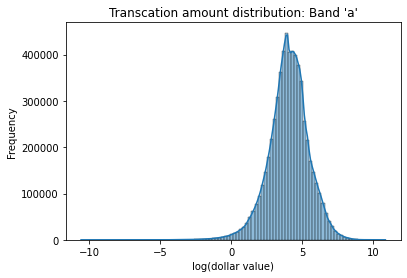

In [60]:
sns.histplot(x = np.log(a_sales), bins=100, kde=True)
plt.xlabel('log(dollar value)')
plt.ylabel('Frequency')
plt.title('Transcation amount distribution: Band \'a\'')
plt.show()

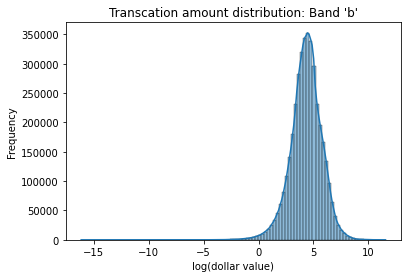

In [59]:
sns.histplot(x = np.log(b_sales), bins=100, kde=True)
plt.xlabel('log(dollar value)')
plt.ylabel('Frequency')
plt.title('Transcation amount distribution: Band \'b\'')
plt.show()

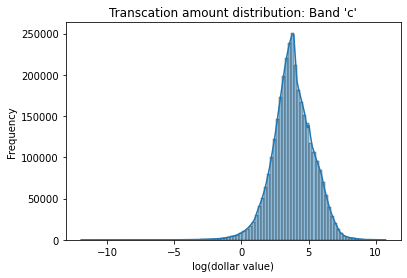

In [58]:
sns.histplot(x = np.log(c_sales), bins=100, kde=True)
plt.xlabel('log(dollar value)')
plt.ylabel('Frequency')
plt.title('Transcation amount distribution: Band \'c\'')
plt.show()

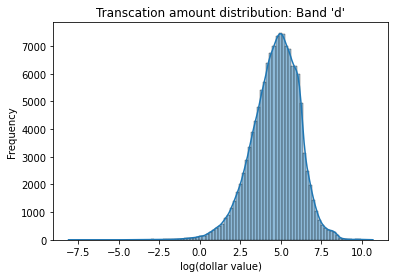

In [56]:
sns.histplot(x = np.log(d_sales), bins=100, kde=True)
plt.xlabel('log(dollar value)')
plt.ylabel('Frequency')
plt.title('Transcation amount distribution: Band \'d\'')
plt.show()

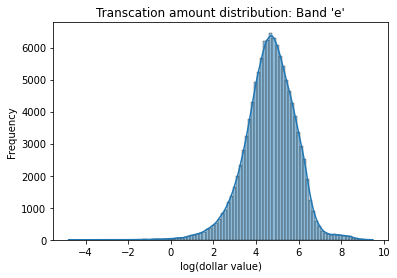

In [53]:
sns.histplot(x = np.log(e_sales), bins=100, kde=True)
plt.xlabel('log(dollar value)')
plt.ylabel('Frequency')
plt.title('Transcation amount distribution: Band \'e\'')
plt.show()

In [61]:
a_sales.mean(), b_sales.mean(), c_sales.mean(), d_sales.mean(), e_sales.mean()

(142.08113719402917,
 197.10167061189236,
 136.49983808642682,
 272.26155837560873,
 205.81212763881703)

In [64]:
a_sales.std(), b_sales.std(), c_sales.std(), d_sales.std(), e_sales.std()

(360.364383024938,
 594.2474556747854,
 434.4194858803137,
 681.0203258609793,
 399.06297651466207)

In [63]:
np.log(a_sales).mean(), np.log(b_sales).mean(), np.log(c_sales).mean(), np.log(d_sales).mean(), np.log(e_sales).mean()

(4.038955118245836,
 4.3331199931654005,
 3.8278962973530644,
 4.679709710974686,
 4.652288332667037)

In [65]:
np.log(a_sales).std(), np.log(b_sales).std(), np.log(c_sales).std(), np.log(d_sales).std(), np.log(e_sales).std()

(1.3931536001478384,
 1.4093276901216711,
 1.484117360298092,
 1.451020251736283,
 1.1852868257354157)